In [1]:
#Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_pop = pd.read_csv('../input/world-population-dataset/world_population.csv')

In [3]:
# Check...
# shape of data
# what are dtypes?
# what does data look like?
# missing values?

In [4]:
# shape of data
print('Shape of Dataframe: ', df_pop.shape, '\n')

# numb of columns
print('Number of columns: ', df_pop.shape[1], '\n')

# numb of rows
print('Number of rows: ', df_pop.shape[0])

Shape of Dataframe:  (234, 17) 

Number of columns:  17 

Number of rows:  234


In [5]:
# what are dtypes and names of columns?
df_pop.dtypes

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [6]:
# what does data look like, ie variables, missing data...
df_pop.head(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03


In [7]:
# change names of X population year to its year
for col in df_pop.columns:
    if 'Poplulation' and '0' in col:
        df_pop = df_pop.rename(columns = {col: col.split(' ')[0]})
        
df_pop.rename(columns = {'Density (per km²)': 'Density', 'Area (km²)' : 'Area'}, inplace = True)
        
df_pop.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area,Density,Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [8]:
# drop columns not needed
df_pop_new = df_pop.drop(['CCA3', 'Capital'], axis = 1)
df_pop_new.head()

,Rank,Country/Territory,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area,Density,Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [9]:
# missing values

print('Number of missing values: \n', df_pop_new.isnull().sum(), '\n')

# there are no missing values. However we see above some values are 0 in world percentage
# is this because smallest countries rightfully make up the smallest percentage 

Number of missing values: 
 Rank                           0
Country/Territory              0
Continent                      0
2022                           0
2020                           0
2015                           0
2010                           0
2000                           0
1990                           0
1980                           0
1970                           0
Area                           0
Density                        0
Growth Rate                    0
World Population Percentage    0
dtype: int64 



In [10]:
# Unique values for the dataframe
print('Number of unique values: \n', df_pop_new.nunique())

Number of unique values: 
 Rank                           234
Country/Territory              234
Continent                        6
2022                           234
2020                           234
2015                           234
2010                           234
2000                           234
1990                           234
1980                           234
1970                           234
Area                           233
Density                        234
Growth Rate                    180
World Population Percentage     70
dtype: int64


In [11]:
# Unique values (repeats) for the column countries. 
print('Names of countries: \n', df_pop_new['Country/Territory'].unique())

#we can use this to see if there are duplicated values but spelled differently

Names of countries: 
 ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'DR Congo' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Falkland Islands' 'Faroe Islands' 'Fiji'
 'Finland' 'France' 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Grenada'
 'Guadeloupe' 'G

In [12]:
# Find total duplicates
df_pop_new.duplicated().sum()

0

In [13]:
#if there were any then we could use this to find in what columns
df_pop_new[df_pop_new.duplicated()].sum()

Rank                           0.0
Country/Territory              0.0
Continent                      0.0
2022                           0.0
2020                           0.0
2015                           0.0
2010                           0.0
2000                           0.0
1990                           0.0
1980                           0.0
1970                           0.0
Area                           0.0
Density                        0.0
Growth Rate                    0.0
World Population Percentage    0.0
dtype: float64

In [14]:
# how many countries are counted in each Continent

continent_values = df_pop_new.Continent.value_counts()
continent_values

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64

In [15]:
# Top 5 Ranks
rank= df_pop_new[['Rank','Country/Territory']].sort_values('Rank').head()
rank

,Rank,Country/Territory
41,1,China
92,2,India
221,3,United States
93,4,Indonesia
156,5,Pakistan


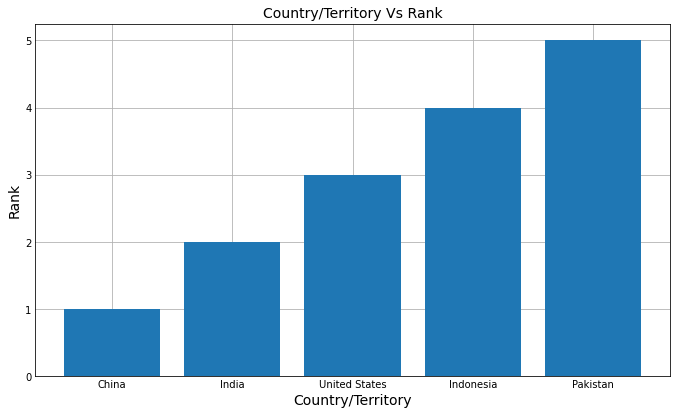

In [16]:
#plot bar chart of top 5 ranks
plt.style.use('_mpl-gallery')

plt.figure(figsize=(9, 5))
plt.bar(rank['Country/Territory'], rank['Rank'])
plt.title('Country/Territory Vs Rank', fontsize=14)
plt.xlabel('Country/Territory', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.show()

In [17]:
#Top 5 populations
pop = df_pop_new[['2022','Country/Territory']].sort_values('2022', ascending = False).head()
pop

,2022,Country/Territory
41,1425887337,China
92,1417173173,India
221,338289857,United States
93,275501339,Indonesia
156,235824862,Pakistan


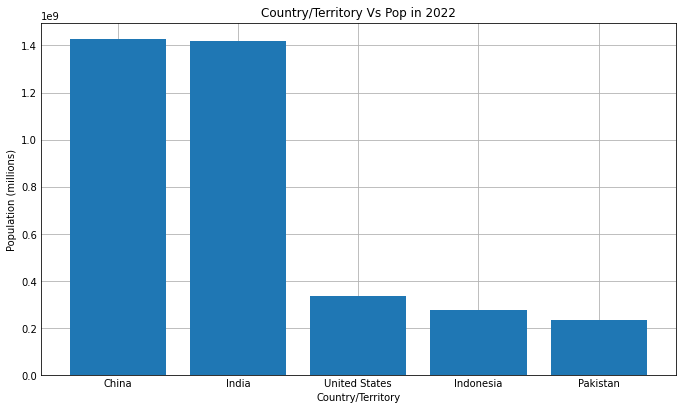

In [18]:
plt.figure(figsize=(9, 5))
plt.bar(pop['Country/Territory'], pop['2022'])
plt.title('Country/Territory Vs Pop in 2022')
plt.xlabel('Country/Territory')
plt.ylabel('Population (millions)')
plt.show()

In [19]:
#Top 5 World Population Percentage

pop_prct = df_pop_new[['World Population Percentage','Country/Territory']].sort_values('World Population Percentage', ascending = False).head()
pop_prct

,World Population Percentage,Country/Territory
41,17.88,China
92,17.77,India
221,4.24,United States
93,3.45,Indonesia
156,2.96,Pakistan


In [20]:
# Density
density = df_pop_new[['Density','Country/Territory']].sort_values('Density', ascending = False).head()
density

,Density,Country/Territory
119,23172.2667,Macau
134,18234.5000,Monaco
187,8416.4634,Singapore
89,6783.3922,Hong Kong
76,5441.5000,Gibraltar
